# Z-score outlier detection on MNIST 

- In this notebook we empirically compare t-SNE and UMAP data transformations as the pre-processing step for novelty deyection on MNIST sataset. It is a wel-know fact that using t-SNE or UMAP as a preprocessing step for k-means clustering gives good results when reducing the number of components to 2. 

- For that matter, the interesting point would be to compare the z-score outlier detection method based on t-SNE, UMAP and non-processed data. The test set is containing the same number of novel points as normal ones. For that reason the accuracy score is represented as the appropriate measure for the novelty detection performance.

In [24]:
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
import sklearn
digits = load_digits()
digits.data.shape
data = digits.data

In [25]:
import numpy as np
inliers_indexes = np.where(digits.target == 2)[0]
outlier_indexes = np.where(digits.target != 2)[0]

In [26]:
data.shape

(1797, 64)

In [27]:
inliers = digits.data[inliers_indexes,:]
inliers.shape

(177, 64)

In [28]:
inliers_train = inliers[:100,:]
inliers_test = inliers[100:,:]
inliers_train.shape, inliers_test.shape

((100, 64), (77, 64))

In [29]:
outliers = digits.data[outlier_indexes,:]
sample_indexes = np.random.choice(outliers.shape[0], size = 77)
outliers = outliers[sample_indexes, :]
test = np.concatenate((inliers_test, outliers))
labels = np.concatenate((np.zeros(inliers_test.shape[0]), np.ones(outliers.shape[0])))
outliers.shape, test.shape, labels.shape

((77, 64), (154, 64), (154,))

In [30]:
dummy_labels = np.ones(test.shape[0])
accuracy_score(labels, dummy_labels)

0.5

In [31]:
all_data = np.concatenate((inliers_train,test))
all_labels = np.concatenate((np.zeros(inliers_train.shape[0]),labels))

# Accuracy UMAP

In [32]:
import umap
X_umap = umap.UMAP().fit_transform(all_data)

In [33]:
X_umap.shape

(254, 2)

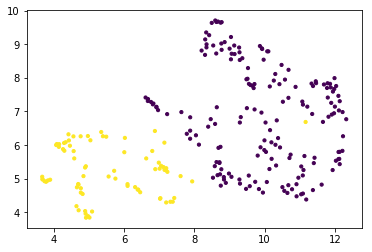

In [34]:
import matplotlib.pyplot as plt
plt.scatter(X_umap[:, 0], X_umap[:, 1], s=10, c=all_labels)
plt.show()

In [35]:
digits_proj = X_umap
inliers_train_proj = digits_proj[:inliers_train.shape[0],:]
test_proj = digits_proj[inliers_train.shape[0]:,:]

In [36]:
mean_vector = np.mean(inliers_train_proj, axis = 0) 
std = np.std(inliers_train_proj) 
print('mean of the dataset is', mean_vector) 
print('std. deviation is', std) 
thr = mean_vector + 3 * std
z = (test_proj-mean_vector)/std 
z.shape
outlier_idx = np.append(np.where(z>=2)[0], np.where(z<=-2)[0])
outlier_idx.shape
predicted_labels = np.zeros(test_proj.shape[0])
predicted_labels[outlier_idx]=1
sklearn.metrics.accuracy_score(labels, predicted_labels)

mean of the dataset is [9.765928  6.4217005]
std. deviation is 2.1832328


0.7792207792207793

# Accuracy with t-SNE

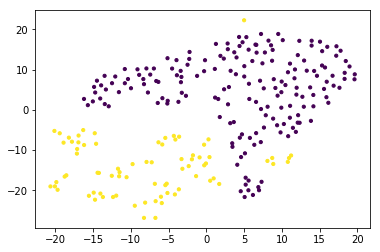

In [37]:
from sklearn.manifold import TSNE
import numpy as np

all_data = np.concatenate((inliers_train,test))
all_labels = np.concatenate((np.zeros(inliers_train.shape[0]),labels))
# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(all_data)
inliers_train_proj = digits_proj[:inliers_train.shape[0],:]
test_proj = digits_proj[inliers_train.shape[0]:,:]
# Plot t-sne projection
plt.scatter(digits_proj[:, 0], digits_proj[:, 1], s=10, c=all_labels)
plt.show()

In [38]:
mean_vector = np.mean(inliers_train_proj, axis = 0) 
std = np.std(inliers_train_proj) 
print('mean of the dataset is', mean_vector) 
print('std. deviation is', std) 
thr = mean_vector + 3 * std
z = (test_proj-mean_vector)/std 
z.shape
outlier_idx = np.append(np.where(z>=2)[0], np.where(z<=-2)[0])
outlier_idx.shape
predicted_labels = np.zeros(test_proj.shape[0])
predicted_labels[outlier_idx]=1

mean of the dataset is [6.851264  3.0641265]
std. deviation is 9.0466385


In [39]:
sklearn.metrics.accuracy_score(labels, predicted_labels)

0.7337662337662337

# Accuracy on original data

In [40]:
# accuracy in general
mean_vector = np.mean(inliers_train, axis = 0) 
std = np.std(inliers_train) 
print('mean of the dataset is', mean_vector) 
print('std. deviation is', std) 
thr = mean_vector + 3 * std
z = (test-mean_vector)/std 
z.shape
outlier_idx = np.append(np.where(z>=2)[0], np.where(z<=-2)[0])
outlier_idx.shape
predicted_labels = np.zeros(test_proj.shape[0])
predicted_labels[outlier_idx]=1

mean of the dataset is [0.000e+00 7.200e-01 8.620e+00 1.351e+01 9.750e+00 2.680e+00 1.900e-01
 0.000e+00 0.000e+00 4.860e+00 1.365e+01 1.249e+01 1.313e+01 5.300e+00
 6.200e-01 0.000e+00 1.000e-02 4.970e+00 8.390e+00 5.130e+00 1.234e+01
 5.380e+00 5.100e-01 0.000e+00 0.000e+00 1.320e+00 2.430e+00 5.800e+00
 1.273e+01 3.520e+00 1.800e-01 0.000e+00 0.000e+00 1.100e-01 1.820e+00
 1.025e+01 1.024e+01 1.410e+00 0.000e+00 0.000e+00 0.000e+00 9.800e-01
 6.820e+00 1.242e+01 5.680e+00 1.240e+00 9.200e-01 0.000e+00 3.000e-02
 1.750e+00 1.140e+01 1.410e+01 1.111e+01 9.730e+00 5.640e+00 5.100e-01
 1.000e-02 7.500e-01 8.800e+00 1.368e+01 1.373e+01 1.238e+01 7.600e+00
 1.470e+00]
std. deviation is 6.066715349498107


In [41]:
sklearn.metrics.accuracy_score(labels, predicted_labels)

0.8961038961038961

- The main take away would be that UMAP and t-SNE are not deterministic, they give different results with every run ranging the possible accuracy values from ~70% to 90%. z-score on non-projected data provides better accuracy (retains more information about the data), and nor UMAP nor t-SNE provide the advantage by mapping the structure. 

- Parameter k in z score that is chosen to be 2 in our run, in the essence depends on the assumption of the normally distributed data and a priori knowledge about the number of outliers 

- Possible extension: applying clustering and labeling each cluster as normal or novel points depending on the closeness of the chosen cluster to the train data, as i.e. UMAP or t-SNE perform great on MNIST.